In [67]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [68]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [69]:
NUM_CLASSES = 6

# Dataset reading

In [70]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [71]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [73]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [74]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_6 (Dropout)             │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 6)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,136 (4.44 KB)

 Trainable params: 1,136 (4.44 KB)

 Non-trainable params: 0 (0.00 B)

In [75]:
# Model checkpoint callback
model_save_path = "model/keypoint_classifier/keypoint_classifier.keras"
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)

# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [76]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [77]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 10s 343ms/step - accuracy: 0.2734 - loss: 2.0037
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2793 - loss: 1.8725 - val_accuracy: 0.3052 - val_loss: 1.6455
Epoch 2/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3359 - loss: 1.6827
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3153 - loss: 1.6581 - val_accuracy: 0.4069 - val_loss: 1.5467
Epoch 3/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3594 - loss: 1.6107
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3595 - loss: 1.5702 - val_accuracy: 0.4544 - val_loss: 1.4584
Epoch 4/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3828 - loss: 1.5330
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.ker

In [78]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9662 - loss: 0.2602 


In [79]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [80]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[9.5094442e-01 4.7940526e-02 8.5215521e-04 2.3278073e-04 1.8919242e-07
 2.9845329e-05]
0


# Confusion matrix

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step


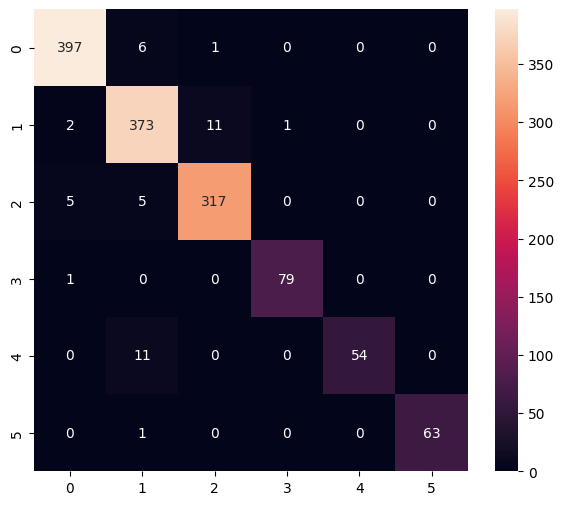

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       404
           1       0.94      0.96      0.95       387
           2       0.96      0.97      0.97       327
           3       0.99      0.99      0.99        80
           4       1.00      0.83      0.91        65
           5       1.00      0.98      0.99        64

    accuracy                           0.97      1327
   macro avg       0.98      0.95      0.96      1327
weighted avg       0.97      0.97      0.97      1327



In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [82]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [83]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/wz/3_gws17s2b5cvmg31b4my9400000gn/T/tmpfnvw17er/assets


INFO:tensorflow:Assets written to: /var/folders/wz/3_gws17s2b5cvmg31b4my9400000gn/T/tmpfnvw17er/assets


Saved artifact at '/var/folders/wz/3_gws17s2b5cvmg31b4my9400000gn/T/tmpfnvw17er'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_3')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  6069236368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6069239440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6069226384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6069224848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6069223696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6069225424: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1736451224.245839 15726158 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1736451224.245848 15726158 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-01-09 11:33:44.245952: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/wz/3_gws17s2b5cvmg31b4my9400000gn/T/tmpfnvw17er
2025-01-09 11:33:44.246285: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-01-09 11:33:44.246290: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /var/folders/wz/3_gws17s2b5cvmg31b4my9400000gn/T/tmpfnvw17er
2025-01-09 11:33:44.249497: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-01-09 11:33:44.266982: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /var/folders/wz/3_gws17s2b5cvmg31b4my9400000gn/T/tmpfnvw17er
2025-01-09 11:33:44.272658: I tensorflow/cc/saved_model/loader.c

6720

# Inference test

In [84]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [85]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [86]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [87]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 74 µs, sys: 78 µs, total: 152 µs
Wall time: 95.8 µs


In [88]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.5094442e-01 4.7940567e-02 8.5215643e-04 2.3278118e-04 1.8919297e-07
 2.9845332e-05]
0
